In [48]:
# Chapter 9, Exercise 5
# Here, I reuse much of my code (that I used to generate
# data with a non-linear decision boundary) in Exercise 4.
# Packages/options:
rm(list=ls())
library(stats)
# For logistic regression/glm function
library(e1071)
# For svm() function
library(ROCR)
# For ROC plots.
# Number of observations:
num_obs <- 500
abs_uni <- 10
# Systemic separation to generate x2
sys_sep <- 20
# Here, as the problem only asks about performance on the
# training set, I set this parm = 100%.
# Approximate percent in training set:
trn_per <- 1
# Logistic regression threshold: above which we predict red.
log_thr <- 0.5

In [49]:
# Part a:
# Generate a simulated 2-class dataset with num_obs obs.
# Generate x1 as uniform deviates from uniform distribution:
set.seed(1)
x1 <- runif(num_obs, min=-abs_uni, max=abs_uni)
head(x1, 5)

[1] -4.689827 -2.557522  1.457067  8.164156 -5.966361

In [50]:
# Arbitrarily set the first num_obs/2 values of the response variable
# equal to red, the rest to blue:
cols <- c(rep('red',num_obs/2), rep('blue',num_obs/2))
# Let's inspect obs numbers 48-52 to see the switch:
begin_view <- num_obs/2-2
end_view   <- num_obs/2+2
print(cols[begin_view:end_view])

[1] "red"  "red"  "red"  "blue" "blue"


In [51]:
# I'd like the nonlinear separation to be of the form y=x^2,
# plus or minus some noise.
# Raise up red entries above the divider, allow blue to
# sink down below:
col_ind <- ifelse(cols=='red', 1, -1)
print(col_ind[begin_view:end_view])
noise     <- rnorm(num_obs, mean=0, sd=3)
print(head(noise))
x2        <- (x1^2+col_ind*sys_sep+noise)
print(head(x2))

[1]  1  1  1 -1 -1
[1]  0.4086657  1.2215028 -0.2089644 -0.7429930  2.0866524  3.4386851
[1] 42.40314 27.76242 21.91408 85.91045 57.68412 86.92442


In [52]:
# Combine into df:
twoclass_df <- data.frame(cols, x1, x2)
head(twoclass_df)

,cols,x1,x2
,<fct>,<dbl>,<dbl>
1,red,-4.689827,42.40314
2,red,-2.557522,27.76242
3,red,1.457067,21.91408
4,red,8.164156,85.91045
5,red,-5.966361,57.68412
6,red,7.967794,86.92442


The following objects are masked _by_ .GlobalEnv:

    cols, x1, x2




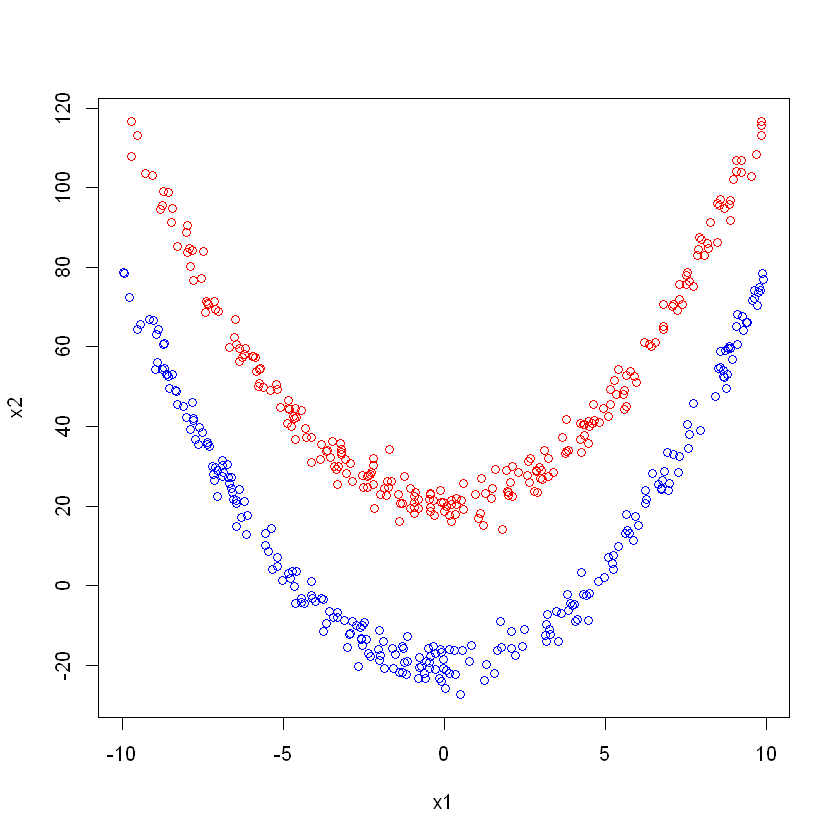

In [53]:
# Part b:
# Plot:
attach(twoclass_df); 
plot(twoclass_df$x1, twoclass_df$x2, col=c("blue","red")[twoclass_df$cols],
    xlab="x1", ylab="x2") 
detach(twoclass_df)
# There is clearly a visible, but nonlinear, separation
# between the two classes.

In [54]:
# Part c:
# Fit a logistic regression model to the data, using x1
# and x2 as predictors.
logreg_mod <- glm(cols~x1+x2, data=twoclass_df, family="binomial")
summary(logreg_mod)


Call:
glm(formula = cols ~ x1 + x2, family = "binomial", data = twoclass_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00749  -0.80982  -0.08696   1.02377   1.47320  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.237e+00  1.608e-01  -7.691 1.46e-14 ***
x1           8.928e-05  1.928e-02   0.005    0.996    
x2           3.952e-02  3.981e-03   9.929  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 693.15  on 499  degrees of freedom
Residual deviance: 547.15  on 497  degrees of freedom
AIC: 553.15

Number of Fisher Scoring iterations: 4


In [55]:
# Part d:
linlogreg <- predict(logreg_mod, newdata=twoclass_df, type="response")
twoclass_df$pred_linlogreg <- as.factor(ifelse(linlogreg>log_thr, "red", "blue"))
head(twoclass_df)

,cols,x1,x2,pred_linlogreg
,<fct>,<dbl>,<dbl>,<fct>
1,red,-4.689827,42.40314,red
2,red,-2.557522,27.76242,blue
3,red,1.457067,21.91408,blue
4,red,8.164156,85.91045,red
5,red,-5.966361,57.68412,red
6,red,7.967794,86.92442,red


The following objects are masked _by_ .GlobalEnv:

    cols, x1, x2




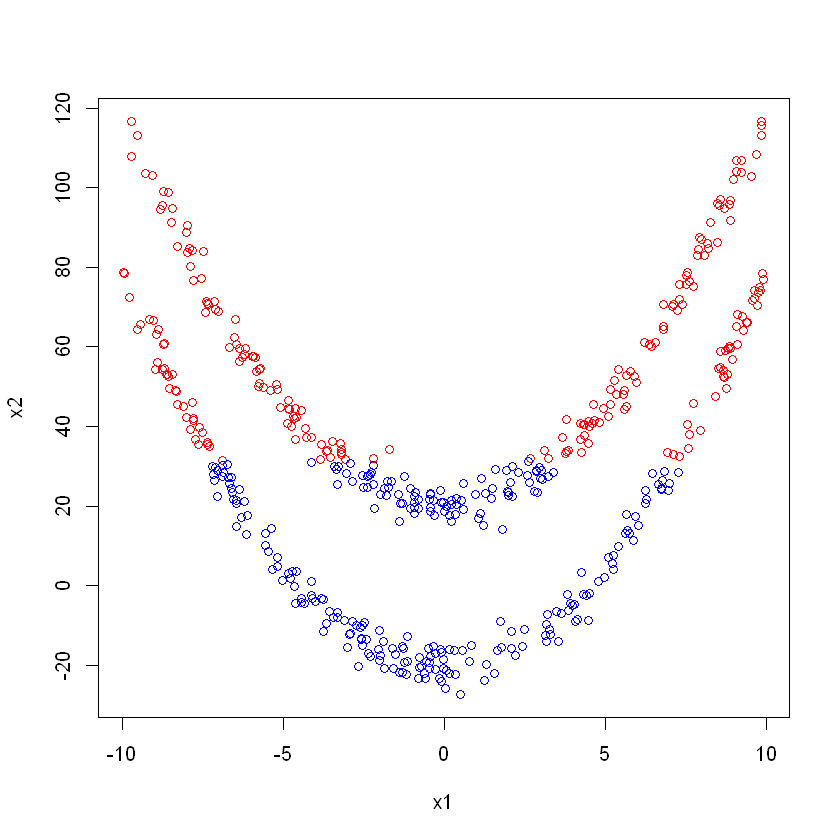

In [56]:
# Plot based on predicted class labels:
attach(twoclass_df); 
plot(twoclass_df$x1, twoclass_df$x2, col=c("blue","red")[twoclass_df$pred_linlogreg],
    xlab="x1", ylab="x2") 
detach(twoclass_df)
# As expected, the decision boundary is linear.

In [57]:
# Part e:
# Fit a second logistic regression function, this time using
# nonlinear functions of the 2 feature variables:
logregquad_mod <- glm(cols~x1+x2+I(x1^2)+I(x2^2), data=twoclass_df, 
                      family="binomial")
summary(logregquad_mod)
# Warning message caused by perfect fit on data which was 
# simulated to cause a....perfect fit.

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = cols ~ x1 + x2 + I(x1^2) + I(x2^2), family = "binomial", 
    data = twoclass_df)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.417e-05  -2.100e-08   0.000e+00   2.100e-08   5.128e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  6.970e-01  1.443e+04   0.000    1.000
x1          -5.271e-03  3.081e+03   0.000    1.000
x2           1.796e+00  1.086e+03   0.002    0.999
I(x1^2)     -1.766e+00  9.630e+02  -0.002    0.999
I(x2^2)     -2.699e-04  9.747e+00   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9315e+02  on 499  degrees of freedom
Residual deviance: 6.4526e-09  on 495  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [58]:
# Part f:
quadlogreg <- predict(logregquad_mod, newdata=twoclass_df, type="response")
twoclass_df$pred_quadlogreg <- as.factor(ifelse(quadlogreg>log_thr, "red", "blue"))
head(twoclass_df)

,cols,x1,x2,pred_linlogreg,pred_quadlogreg
,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,red,-4.689827,42.40314,red,red
2,red,-2.557522,27.76242,blue,red
3,red,1.457067,21.91408,blue,red
4,red,8.164156,85.91045,red,red
5,red,-5.966361,57.68412,red,red
6,red,7.967794,86.92442,red,red


In [59]:
# Confusion matrix:
table(twoclass_df$cols, twoclass_df$pred_quadlogreg)
# Clearly, this predicts most values correctly.

      
       blue red
  blue  250   0
  red     0 250

The following objects are masked _by_ .GlobalEnv:

    cols, x1, x2




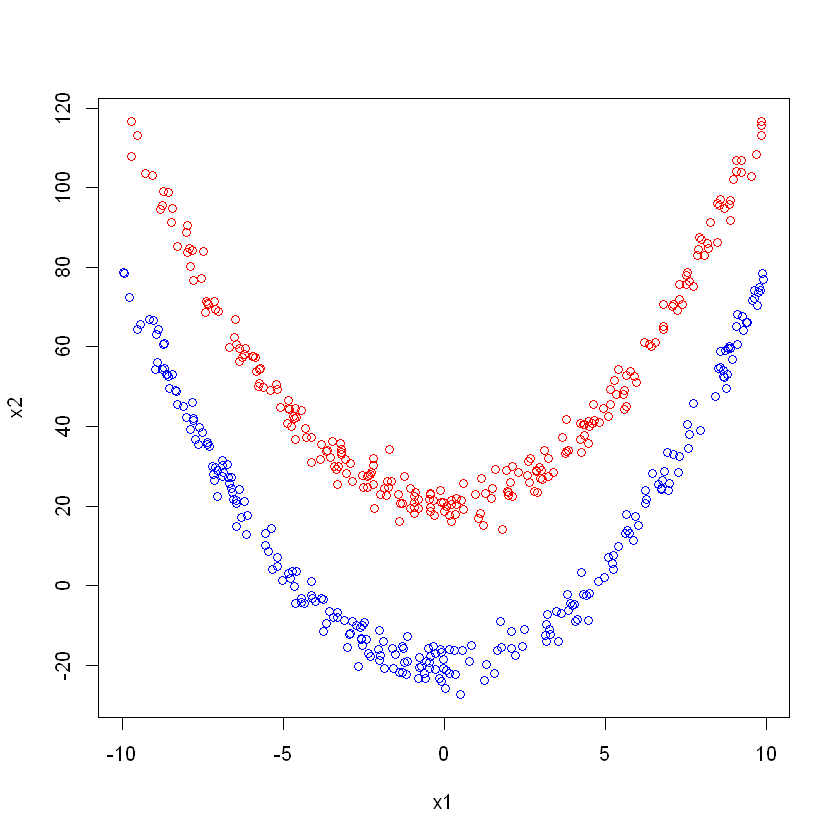

In [60]:
# Plot based on predicted class labels:
attach(twoclass_df); 
plot(twoclass_df$x1, twoclass_df$x2, col=c("blue","red")[twoclass_df$pred_quadlogreg],
    xlab="x1", ylab="x2") 
detach(twoclass_df)
# As expected, the decision boundary is obviously nonlinear, as it 
# separates perfectly these two classes separted by quadratic boundary.

In [61]:
# Part g
# Fit a SVC to this data, using X1 and X2 as features:
# Code Red==1, Blue==-1
twoclass_df$y  <- as.factor(ifelse(twoclass_df$col=="red", 1, -1))
print(head(twoclass_df))
twoclass_clean <- twoclass_df[,-c(1)]
print(head(twoclass_clean))

  cols        x1       x2 pred_linlogreg pred_quadlogreg y
1  red -4.689827 42.40314            red             red 1
2  red -2.557522 27.76242           blue             red 1
3  red  1.457067 21.91408           blue             red 1
4  red  8.164156 85.91045            red             red 1
5  red -5.966361 57.68412            red             red 1
6  red  7.967794 86.92442            red             red 1
         x1       x2 pred_linlogreg pred_quadlogreg y
1 -4.689827 42.40314            red             red 1
2 -2.557522 27.76242           blue             red 1
3  1.457067 21.91408           blue             red 1
4  8.164156 85.91045            red             red 1
5 -5.966361 57.68412            red             red 1
6  7.967794 86.92442            red             red 1


In [62]:
# Tune a SV Classifier:
set.seed(1)
tune.out <- tune(svm, y~x1+x2, data=twoclass_df, kernel="linear", 
                 ranges=list(cost=c(0.001, 0.1, 10, 100, 1000, 10000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.28 

- Detailed performance results:
   cost error dispersion
1 1e-03 0.546 0.06257440
2 1e-01 0.284 0.04880801
3 1e+01 0.280 0.04898979
4 1e+02 0.280 0.04898979
5 1e+03 0.280 0.04898979
6 1e+04 0.500 0.07180220


The following objects are masked _by_ .GlobalEnv:

    cols, x1, x2




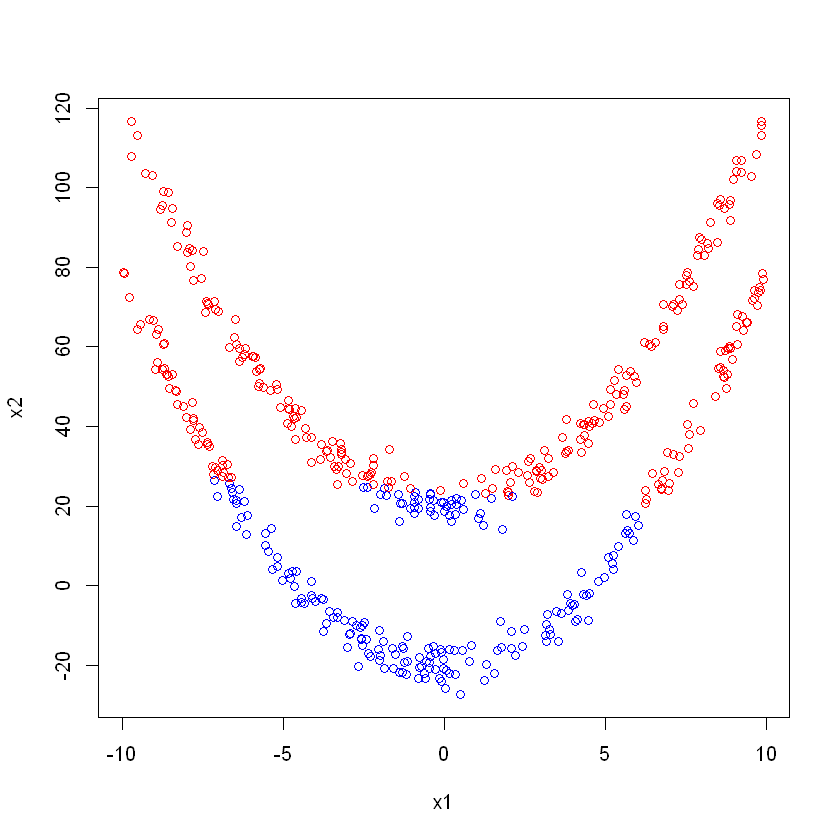

In [63]:
# Generate predictions using the best SV Classifier:
bestmod  <- tune.out$best.model
twoclass_df$pred_svc <- predict(bestmod, newdata=twoclass_df)
attach(twoclass_df); 
plot(twoclass_df$x1, twoclass_df$x2, col=c("blue","red")[twoclass_df$pred_svc],
    xlab="x1", ylab="x2") 
detach(twoclass_df)
# As expected, the decision boundary is linear.

In [64]:
# Part h:
# SVM, using polynomial kernel of degree=2.
set.seed(1)
tune.out2 <- tune(svm, y~x1+x2, data=twoclass_df, kernel="polynomial", degree=2, 
                 gamma=1, coef0=1, ranges=list(cost=c(0.001, 1, 10, 1000, 100000)))
summary(tune.out2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0 

- Detailed performance results:
   cost error dispersion
1 1e-03 0.388 0.04638007
2 1e+00 0.000 0.00000000
3 1e+01 0.000 0.00000000
4 1e+03 0.000 0.00000000
5 1e+05 0.000 0.00000000


The following objects are masked _by_ .GlobalEnv:

    cols, x1, x2




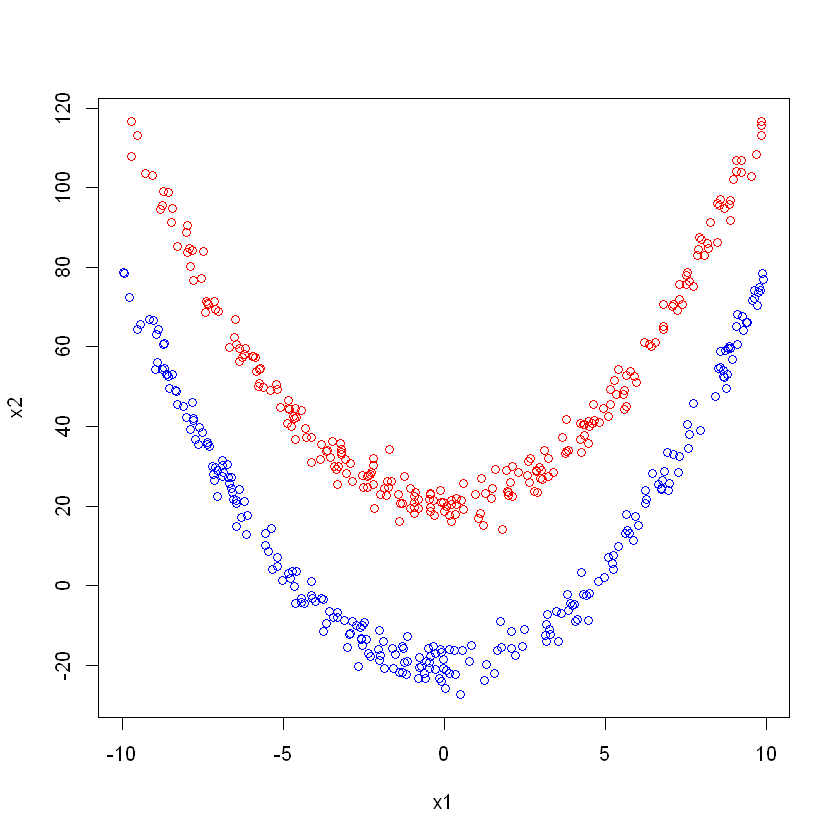

In [65]:
# Generate predictions using the best SVM:
bestmod2  <- tune.out2$best.model
twoclass_df$pred_svm <- predict(bestmod2, newdata=twoclass_df)
attach(twoclass_df); 
plot(twoclass_df$x1, twoclass_df$x2, col=c("blue","red")[twoclass_df$pred_svm],
    xlab="x1", ylab="x2") 
detach(twoclass_df)
# As expected, the decision boundary is nonlinear, and results in perfect
# classification of all observations.

In [ ]:
# Part i:
# Clearly, the SVC and logistic regression using only linear terms of 
# x1 and x2 give very similar results: a linear decision boundary that
# is a horizontal line, and provides a poor classification outcome.
# Both logistic regression containing both linear and quadratic terms
# as well as a SVM with polynomial kernel of degree 2 drive the same
# outcome: perfect predictions on the training data.  This is not surprising,
# as both contain the appropriate features (namely: a constant, x1^2 term, and
# a x2 term) to perfectly fit the training data.